# Análise e Previsão de Risco de Crédito

Vamos trabalhar com o 'Conjunto de Dados de Risco de Crédito' do Kaggle. Neste projeto, vamos analisar e pré-processar os dados de diversos indivíduos e construir modelos de aprendizado de máquina para determinar se os empréstimos serão concedidos ou não. Vamos testar os modelos 'Rede Neural', 'Gradient Boosting', 'Random Forest', 'XGBoost', 'SVM', 'KNN', 'Regressão Logística' e 'Naive Bayes'.

Link do Conjunto de Dados: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

# Resumo

### Capítulo 1: Análise Exploratória e Estatística
- 1.1: Importando Dados e Primeira Visualização
- 1.2: Verificando Valores Nulos
- 1.3: Verificando Tipos de Dados
- 1.4: Análise Final dos Dados
- 1.5: Plotagem de Gráficos

### Capítulo 2: Manipulação de Dados
- 2.1: Valores Ausentes
- 2.2: Tratamento de Outliers
- 2.3: Tratamento de Tipos de Dados Incorretos
- 2.4: Codificação One Hot
- 2.5: Padronização

### Capítulo 3: Construção e Teste de Modelos de Aprendizado de Máquina
- 3.1: Divisão dos Dados em Conjuntos de Treinamento e Teste
- 3.2: Regressão Logística
- 3.3: Random Forest
- 3.4: Gradient Boosting
- 3.5: Máquina de Vetores de Suporte (SVM)
- 3.6: K-Nearest Neighbors (KNN)
- 3.7: Redes Neurais

### Capítulo 4: Conclusão

# Capítulo 1 - Análise Exploratória e Estatística

Nesta seção, examinamos de perto nossos dados para entender o que eles podem nos dizer. Começamos resumindo as principais características dos dados e depois usamos gráficos e tabelas para visualizá-los de uma forma fácil de entender. Ao fazer isso, esperamos encontrar padrões ou tendências interessantes que possam nos orientar em nossa análise posterior. Este passo é crucial para conhecermos melhor nossos dados antes de nos aprofundarmos em técnicas mais avançadas.

In [103]:
# Let's start by importing the initial libraries needed to carry out our project.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Eliminate the warnings. 
import warnings
warnings.filterwarnings("ignore")

- person_age: Idade
- person_income: Renda Anual
- person_home_ownership: Propriedade da Residência
- person_emp_length: Tempo de Emprego (em anos)
- loan_intent: Intenção do Empréstimo
- loan_grade: Grau do Empréstimo
- loan_amnt: Valor do Empréstimo
- loan_int_rate: Taxa de Juros
- loan_status: Status do Empréstimo (0 para não inadimplente, 1 para inadimplente)
- loan_percent_income: Percentual da Renda
- cb_person_default_on_file: Histórico de Inadimplência do Cliente
- cb_preson_cred_hist_length: Tempo de Histórico de Crédito do Cliente

"loan_status" é nossa classe alvo.

loan_status 0 = empréstimo negado.

loan_status 1 = empréstimo aprovado.

### 1.1: Importando Dados e Primeira Visualização

Vamos começar importando nossos dados de um arquivo '.csv' usando a biblioteca Pandas, para que possamos visualizar nossos dados e realizar uma análise inicial sobre eles.

In [104]:
# Vamos começar usando a biblioteca 'Pandas' para ler o arquivo 'credit_risk_dataset.csv'.
credit_df = pd.read_csv("credit_risk_dataset.csv", index_col=0)

# Vamos visualizar as primeiras 5 e últimas 5 linhas do dataframe para verificar os dados.
credit_df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


In [105]:
# Aqui, usaremos o método 'describe()' para verificar algumas estatísticas descritivas sobre as colunas numéricas do dataframe 'credit_df'.
credit_df.describe() 

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [106]:
credit_df['loan_status'].unique()

array([1, 0], dtype=int64)

In [107]:
# Verificar a quantidade de 0s e 1s na coluna 'loan_status'
loan_status_counts = credit_df['loan_status'].value_counts()

# Exibir os resultados
print("Quantidade de 0s e 1s na classe 'loan_status':")
print(loan_status_counts)

Quantidade de 0s e 1s na classe 'loan_status':
loan_status
0    25473
1     7108
Name: count, dtype: int64


### 1.2: Verificando Valores Nulos

Vamos usar os métodos 'isnull' e 'sum' para somar os valores nulos em cada coluna.

In [108]:
credit_df.isnull().sum()

person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

"person_emp_length" e "loan_int_rate" são as colunas que possuem valores nulos em nosso conjunto de dados.

### 1.3: Verificando Tipos de Dados

Vamos usar o atributo 'dtypes' do dataframe 'credit_df' para verificar os tipos de dados de cada coluna.

In [109]:
credit_df.dtypes

person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Vamos verificar se os dados únicos estão corretos na coluna 'cb_person_default_on_file'.

In [110]:
credit_df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

A coluna 'cb_person_default_on_file' tem apenas dois tipos de entradas: 'Y' para 'Sim' e 'N' para 'Não'.

Vamos transformá-la ainda mais para o formato 'Booleano' para adequá-la melhor aos modelos de aprendizado de máquina.

### 1.4: Análise Final dos Dados

In [111]:
# Verificar os valores únicos em person_home_ownership.
credit_df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [112]:
# Verificar os valores únicos em loan_intent.
credit_df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [113]:
# Verificar os valores únicos em loan_grade.
credit_df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

### 1.5: Plotagem de Gráficos

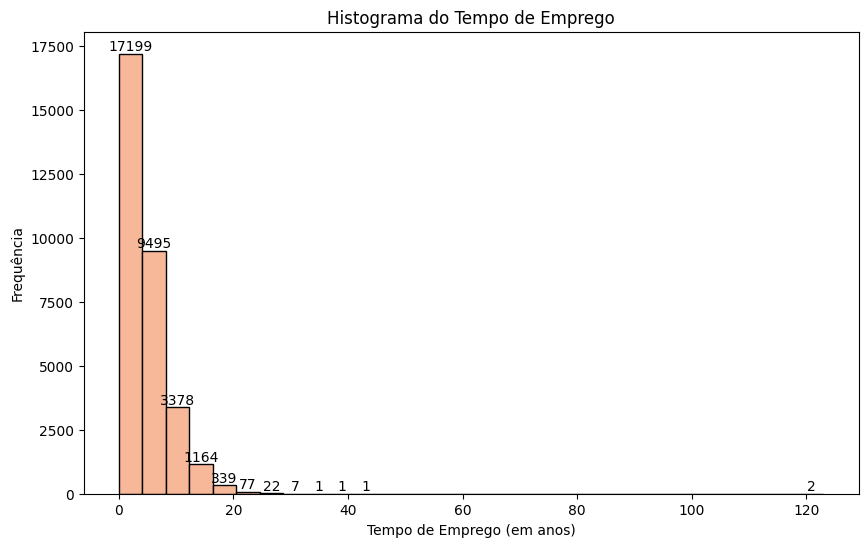

In [114]:
# Definindo uma paleta de cores usando a função color_palette() do seaborn
colors = sns.color_palette("RdBu", n_colors=2)

# Criando o histograma
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(credit_df['person_emp_length'].dropna(), bins=30, edgecolor='black', color=colors[0])  # Usando a primeira cor da paleta

# Adicionando números específicos sobre as barras
for count, value in zip(n, bins[:-1]):
    if count > 0:
        plt.text(value + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

# Definindo o título e rótulos dos eixos
plt.title('Histograma do Tempo de Emprego')
plt.xlabel('Tempo de Emprego (em anos)')
plt.ylabel('Frequência')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('tempo_emprego_plot.png', bbox_inches='tight')

# Exibindo o histograma
plt.show()

Foi detectado um valor atípico acima de 120 e iremos lidar com ele no próximo passo.

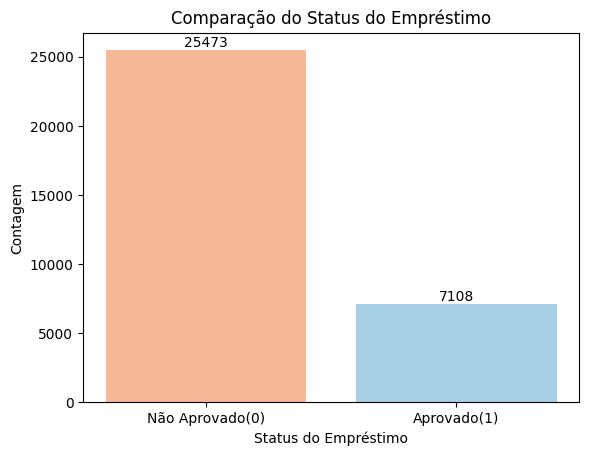

In [115]:
# Contagem de entradas com valor 0 e 1
count_0 = credit_df['loan_status'].value_counts()[0]
count_1 = credit_df['loan_status'].value_counts()[1]

# # Definindo cores
# colors = ['tomato', 'steelblue']

# Criando o gráfico de barras com cores
plt.bar(['Não Aprovado(0)', 'Aprovado(1)'], [count_0, count_1], color=colors)

# Adicionando rótulos e título
plt.xlabel('Status do Empréstimo')
plt.ylabel('Contagem')
plt.title('Comparação do Status do Empréstimo')

# Adicionando contagens acima das barras
for i, count in enumerate([count_0, count_1]):
    plt.text(i, count, str(count), ha='center', va='bottom')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('status_emprestimo_plot.png', bbox_inches='tight')

# Exibindo o gráfico
plt.show()

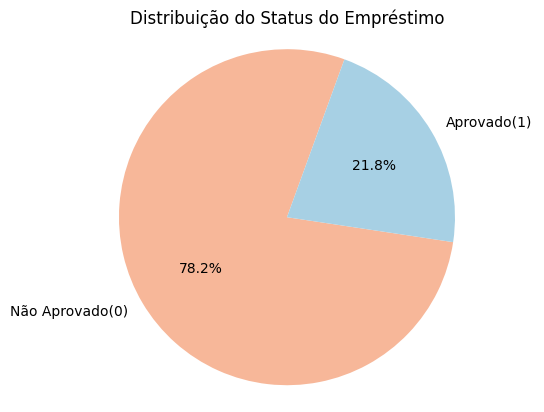

In [116]:
# Calculando a porcentagem de entradas com valor 0 e 1
percentage_0 = (credit_df['loan_status'].value_counts()[0] / len(credit_df)) * 100
percentage_1 = (credit_df['loan_status'].value_counts()[1] / len(credit_df)) * 100

# Criando o gráfico de pizza
labels = ['Não Aprovado(0)', 'Aprovado(1)']
sizes = [percentage_0, percentage_1]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=70, colors=colors)

# Adicionando um título
plt.title('Distribuição do Status do Empréstimo')

# Exibindo o gráfico
plt.axis('equal')  # A proporção igual garante que a pizza seja desenhada como um círculo.

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('emprestimo_distribuicao_plot.png', bbox_inches='tight')

plt.show()

# Capítulo 2: Manipulação de Dados

Nesta seção, arregaçamos as mangas e preparamos nossos dados para análise. Limpeza, transformação e remodelação dos dados brutos em um formato adequado para nossas necessidades. Isso envolve lidar com valores ausentes, remover duplicatas e padronizar formatos. Nosso objetivo nesta fase é garantir que nossos dados sejam confiáveis e consistentes, estabelecendo uma base sólida para nossos futuros modelos de ML. Ao processar os dados de forma eficaz, podemos maximizar a precisão e relevância de nossas percepções, capacitando-nos a tomar decisões informadas com base em informações confiáveis.

### 2.1: Valores Ausentes

Primeiro, vamos lidar com os valores nulos que encontramos em nosso dataframe no passo anterior.

In [117]:
# Criar uma função para substituir valores nulos pelo valor médio de uma coluna específica.
def replace_nan_with_median(dataframe, column_name):
    median_value = dataframe[column_name].median()
    dataframe[column_name].fillna(median_value, inplace=True)

In [118]:
# Usando a função para substituir os valores nulos em 'person_emp_length'.
replace_nan_with_median(credit_df, 'person_emp_length')
 
# Verificar se as substituições foram bem-sucedidas:
credit_df.isnull().sum()

person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [119]:
# Usando a função para substituir os valores em branco em 'loan_int_rate'.
replace_nan_with_median(credit_df, 'loan_int_rate')

# Verificar se ainda existem valores em branco:
credit_df.isnull().sum()

person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 2.2: Tratamento de Outliers

Como é impossível para um ser humano estar empregado por mais de 120 anos, decidimos remover o valor atípico que encontramos no passo anterior

In [120]:
def remove_values_above_max(dataframe, column_name, max_value):
    dataframe.drop(dataframe[dataframe[column_name] > max_value].index, inplace=True)

In [121]:
# Usando a função para substituir valores maiores que 120 em 'person_emp_length'.
remove_values_above_max(credit_df, 'person_emp_length', 120)

# Verificar se os valores foram removidos corretamente
# Aqui vamos verificar o valor máximo desta coluna.
credit_df['person_emp_length'].max()

41.0

### 2.3: Tratamento de Tipos de Dados Incorretos

Agora vamos lidar com os tipos de dados incorretos em nosso dataframe.

In [122]:
def transform_values(dataframe, column_name, value_mapping):
    dataframe[column_name] = dataframe[column_name].map(value_mapping)

In [123]:
# Usando a função para transformar 'Y' em True e 'N' em False em 'cb_person_default_on_file'.
transform_values(credit_df, 'cb_person_default_on_file', {'Y': True, 'N': False})

# Verificando se a transformação foi aplicada corretamente.
credit_df['cb_person_default_on_file'].unique()

array([False,  True])

O código avalia se cada valor da coluna é igual a 'Y'. O resultado será True ou False.

In [124]:
# Mais uma vez, vamos verificar como as primeiras linhas do dataframe ficam após as mudanças.
credit_df.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,False,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,False,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,True,4
26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,False,3
24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,False,4


In [125]:
# Vamos verificar se o tipo de dado em 'cb_person_default_on_file' mudou para booleano.
credit_df.dtypes

person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file        bool
cb_person_cred_hist_length      int64
dtype: object

### 2.4: Codificação One Hot

Aplicando a codificação One Hot nas colunas do tipo 'object'.

In [126]:
# Selecionando colunas categóricas para aplicar codificação one-hot.
columns_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade']

# Aplicando codificação one-hot
credit_df = pd.get_dummies(credit_df, columns=columns_to_encode)
credit_df.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,9600,1.0,5500,12.87,1,0.57,False,3,True,False,...,True,False,False,False,False,True,False,False,False,False
23,65500,4.0,35000,15.23,1,0.53,False,2,False,False,...,True,False,False,False,False,True,False,False,False,False
24,54400,8.0,35000,14.27,1,0.55,True,4,False,False,...,True,False,False,False,False,True,False,False,False,False
26,77100,8.0,35000,12.42,1,0.45,False,3,False,False,...,False,False,False,False,True,False,False,False,False,False
24,78956,5.0,35000,11.11,1,0.44,False,4,False,False,...,True,False,False,False,True,False,False,False,False,False


In [127]:
# Exibir as primeiras linhas do DataFrame com as colunas codificadas.
credit_df.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,9600,1.0,5500,12.87,1,0.57,False,3,True,False,...,True,False,False,False,False,True,False,False,False,False
23,65500,4.0,35000,15.23,1,0.53,False,2,False,False,...,True,False,False,False,False,True,False,False,False,False
24,54400,8.0,35000,14.27,1,0.55,True,4,False,False,...,True,False,False,False,False,True,False,False,False,False
26,77100,8.0,35000,12.42,1,0.45,False,3,False,False,...,False,False,False,False,True,False,False,False,False,False
24,78956,5.0,35000,11.11,1,0.44,False,4,False,False,...,True,False,False,False,True,False,False,False,False,False


In [128]:
# Vamos verificar como as colunas ficam após aplicar a codificação One Hot.
# Observe como o número de colunas mudou.
credit_df.columns

Index(['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G'],
      dtype='object')

In [129]:
# Vamos verificar os tipos de dados das colunas.
# Observe que todas as novas colunas são booleanas.
credit_df.dtypes

person_income                       int64
person_emp_length                 float64
loan_amnt                           int64
loan_int_rate                     float64
loan_status                         int64
loan_percent_income               float64
cb_person_default_on_file            bool
cb_person_cred_hist_length          int64
person_home_ownership_MORTGAGE       bool
person_home_ownership_OTHER          bool
person_home_ownership_OWN            bool
person_home_ownership_RENT           bool
loan_intent_DEBTCONSOLIDATION        bool
loan_intent_EDUCATION                bool
loan_intent_HOMEIMPROVEMENT          bool
loan_intent_MEDICAL                  bool
loan_intent_PERSONAL                 bool
loan_intent_VENTURE                  bool
loan_grade_A                         bool
loan_grade_B                         bool
loan_grade_C                         bool
loan_grade_D                         bool
loan_grade_E                         bool
loan_grade_F                      

### 2.5: Padronização

Agora vamos aplicar um processo de padronização aos dados para trabalhar melhor com eles em modelos de Machine Learning.

- Padronização refere-se ao processo de ajustar a escala dos dados para que tenham uma média de zero e um desvio padrão de 1. O StandardScaler realiza essa normalização subtraindo a média de cada característica e depois dividindo pelo desvio padrão. Isso ajuda a garantir que os dados tenham uma distribuição mais uniforme e pode melhorar o desempenho de muitos algoritmos de aprendizado de máquina.

In [130]:
from sklearn.preprocessing import StandardScaler

# Selecionar apenas as colunas numéricas para padronização.
numeric_columns = credit_df.select_dtypes(include=['float64', 'int64']).columns

# Excluir a coluna 'loan_status' das colunas numéricas
numeric_columns = numeric_columns.drop('loan_status')

# Criar uma cópia do dataframe para evitar alterações no original
credit_df_scaled = credit_df.copy()

# Inicializar o StandardScaler.
scaler = StandardScaler()

# Aplicar padronização apenas às colunas numéricas.
credit_df_scaled[numeric_columns] = scaler.fit_transform(credit_df[numeric_columns])

# Mostrar as primeiras linhas de 'credit_df_padronizado'.
credit_df_scaled.head()


,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,-0.899012,-0.951127,-0.667268,0.600695,1,3.808117,False,-0.786389,True,False,...,True,False,False,False,False,True,False,False,False,False
23,-0.050568,-0.233549,3.921085,1.364416,1,3.429622,False,-1.024891,False,False,...,True,False,False,False,False,True,False,False,False,False
24,-0.219042,0.723222,3.921085,1.053750,1,3.618870,True,-0.547887,False,False,...,True,False,False,False,False,True,False,False,False,False
26,0.125496,0.723222,3.921085,0.455070,1,2.672633,False,-0.786389,False,False,...,False,False,False,False,True,False,False,False,False,False
24,0.153666,0.005643,3.921085,0.031140,1,2.578009,False,-0.547887,False,False,...,True,False,False,False,True,False,False,False,False,False


In [131]:
# # Save churn_df to an csv file
# credit_df_scaled.to_csv('credito_dados_limpo(csv).csv', index=False)

# # Save churn_df to an excel file
# credit_df_scaled.to_excel('credito_dados_limpo(excel).xlsx', index=False)

# Capítulo 3: Construção e Teste de Modelos de Aprendizado de Máquina

Vamos prosseguir com a construção de nossos modelos de Aprendizado de Máquina.

Também iremos realizar algumas 'GridSearch' para encontrar os melhores parâmetros para determinados algoritmos.

Depois disso, vamos testar nossos algoritmos para observar seu desempenho.

Treinamos todos os modelos usando o conjunto de dados padrão, bem como técnicas de undersampling e SMOTE para lidar com o desequilíbrio de classes. No entanto, para fins de otimização do projeto, optamos por reter apenas os modelos mais relevantes.

### 3.1: Divisão dos Dados em Conjuntos de Treinamento e Teste

In [132]:
from sklearn.model_selection import train_test_split

# Separar a variável alvo das outras.
X = credit_df_scaled.drop('loan_status', axis=1)  # Features (independent variables)
y = credit_df_scaled['loan_status']  # Target variable (labels)

# Dividir os dados em conjuntos de treinamento e teste com estratificação
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # Splitting again to obtain the validation set

# Exibindo as formas dos conjuntos de dados resultantes
print("Forma do conjunto de treinamento:", X_train.shape, y_train.shape)
print("Forma do conjunto de validação:", X_val.shape, y_val.shape)
print("Forma do conjunto de teste:", X_test.shape, y_test.shape)

Forma do conjunto de treinamento: (16631, 24) (16631,)
Forma do conjunto de validação: (5544, 24) (5544,)
Forma do conjunto de teste: (5544, 24) (5544,)


In [133]:
# Contando as ocorrências de cada classe nos conjuntos de treinamento, validação e teste
pd.Series(y_train).value_counts(), pd.Series(y_val).value_counts(), pd.Series(y_test).value_counts()

(loan_status
 0    13097
 1     3534
 Name: count, dtype: int64,
 loan_status
 0    4396
 1    1148
 Name: count, dtype: int64,
 loan_status
 0    4374
 1    1170
 Name: count, dtype: int64)

- Undersampling

In [134]:
from imblearn.under_sampling import RandomUnderSampler

# Criar o amostrador para undersampling
undersampler = RandomUnderSampler(random_state=42)

# Aplicar undersampling apenas ao conjunto de treinamento
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

print("Forma do conjunto de treinamento após undersampling:", X_train_us.shape, y_train_us.shape)

Forma do conjunto de treinamento após undersampling: (7068, 24) (7068,)


In [135]:
# Contando as ocorrências de cada classe nos conjuntos de treinamento, validação e teste
pd.Series(y_train_us).value_counts()

loan_status
0    3534
1    3534
Name: count, dtype: int64

- SMOTE

In [136]:
from imblearn.over_sampling import SMOTE

# Aplicar o SMOTE apenas no conjunto de treinamento para lidar com o desequilíbrio de classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [137]:
# Contando as ocorrências de cada classe nos conjuntos de treinamento, validação e teste
pd.Series(y_train_smote).value_counts()

loan_status
0    13097
1    13097
Name: count, dtype: int64

### 3.2: Regressão Logística

- Normal

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instanciar o modelo de regressão logística
logistic_model = LogisticRegression(random_state=42)

# Treinar o modelo de regressão logística
logistic_model.fit(X_train, y_train)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.89      0.95      0.92      4396
    Approved       0.74      0.54      0.63      1148

    accuracy                           0.87      5544
   macro avg       0.81      0.75      0.77      5544
weighted avg       0.86      0.87      0.86      5544



- Undersampling

In [139]:
# Treinar o modelo de regressão logística
logistic_model.fit(X_train_us, y_train_us)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.81      0.87      4396
    Approved       0.52      0.77      0.62      1148

    accuracy                           0.81      5544
   macro avg       0.73      0.79      0.75      5544
weighted avg       0.85      0.81      0.82      5544



### 3.3: Random Forest

- Normal

In [140]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o modelo Random Forest.
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo.
rf_model.fit(X_train, y_train)
# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, rf_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.99      0.96      4396
    Approved       0.95      0.71      0.81      1148

    accuracy                           0.93      5544
   macro avg       0.94      0.85      0.89      5544
weighted avg       0.93      0.93      0.93      5544



- Undersampling

In [141]:
# Train the Random Forest classifier 
rf_model.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.94      0.90      0.92      4396
    Approved       0.67      0.79      0.73      1148

    accuracy                           0.88      5544
   macro avg       0.81      0.84      0.82      5544
weighted avg       0.89      0.88      0.88      5544



- SMOTE

In [142]:
# Treinar o classificador Random Forest
rf_model.fit(X_train_smote, y_train_smote)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, rf_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.97      0.95      4396
    Approved       0.87      0.73      0.79      1148

    accuracy                           0.92      5544
   macro avg       0.90      0.85      0.87      5544
weighted avg       0.92      0.92      0.92      5544



### 3.4: Gradient Boosting

- Normal

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar o modelo Gradient Boosting.
gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150, subsample=0.9, random_state=42)

# Treinar o modelo.
gb_model.fit(X_train, y_train)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, gb_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.99      0.96      4396
    Approved       0.95      0.72      0.82      1148

    accuracy                           0.93      5544
   macro avg       0.94      0.85      0.89      5544
weighted avg       0.94      0.93      0.93      5544



A busca em grade foi realizada para encontrar os melhores parâmetros. O código está comentado abaixo.

In [144]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Define the parameters to be tuned
# param_grid_gb = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0]
# }

# # Initialize the Gradient Boosting model
# gb_model = GradientBoostingClassifier(random_state=42)

# # Create the GridSearchCV object
# grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# # Perform grid search on the training data
# grid_search_gb.fit(X_train, y_train)

# # Best parameters found
# best_params_gb = grid_search_gb.best_params_

# # Train the model with the best parameters
# best_model_gb = grid_search_gb.best_estimator_
# best_model_gb.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred_gb = best_model_gb.predict(X_test)

# # Evaluate the model's performance
# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
# classification_rep_gb = classification_report(y_test, y_pred_gb)

# # Display performance metrics and best parameters
# print(f'Best Gradient Boosting Parameters: {best_params_gb}')
# print(f'Gradient Boosting Accuracy: {accuracy_gb:.4f}')
# print(f'Confusion Matrix for Gradient Boosting:\n{conf_matrix_gb}')
# print(f'Classification Report for Gradient Boosting:\n{classification_rep_gb}')
# # Without grid search, the result had been 0.9265, so it didn't improve much.

- Undersampling

In [145]:
# Treinar o modelo.
gb_model.fit(X_train_us, y_train_us)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, gb_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.95      0.91      0.93      4396
    Approved       0.69      0.80      0.74      1148

    accuracy                           0.88      5544
   macro avg       0.82      0.85      0.83      5544
weighted avg       0.89      0.88      0.89      5544



### 3.5: Máquina de Vetores de Suporte (SVM)

In [146]:
from sklearn.svm import SVC

# Inicializar o modelo SVM.
svm_model = SVC(random_state=42)

# Treinar o modelo.
svm_model.fit(X_train, y_train)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, svm_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.92      0.99      0.95      4396
    Approved       0.93      0.65      0.77      1148

    accuracy                           0.92      5544
   macro avg       0.93      0.82      0.86      5544
weighted avg       0.92      0.92      0.91      5544



### 3.6: K-Nearest Neighbors (KNN)

In [147]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar o modelo KNN.
knn_model = KNeighborsClassifier(metric= 'manhattan', n_neighbors=9, weights='distance')

# Treinar o modelo.
knn_model.fit(X_train, y_train)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, knn_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.91      0.98      0.94      4396
    Approved       0.90      0.61      0.72      1148

    accuracy                           0.90      5544
   macro avg       0.90      0.79      0.83      5544
weighted avg       0.90      0.90      0.90      5544



GridSearch was performed to find the best parameters. The code is commented below.

In [148]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameters you want to test
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],  # test different values for the number of neighbors
#     'weights': ['uniform', 'distance'],  # test different weighting methods
#     'metric': ['euclidean', 'manhattan']  # test different distance metrics
# }

# # Initialize the KNN model
# knn_model = KNeighborsClassifier()

# # Initialize the grid search
# grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)

# # Perform grid search on the training set
# grid_search.fit(X_train, y_train)

# # Get the best parameters found
# best_params = grid_search.best_params_

# # Train the model with the best parameters on the full training set
# best_knn_model = KNeighborsClassifier(**best_params)
# best_knn_model.fit(X_train, y_train)

# # Make predictions on the test set using the optimized model
# y_pred_best_knn = best_knn_model.predict(X_test)

# # Evaluate the performance of the optimized model
# accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
# conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
# classification_rep_best_knn = classification_report(y_test, y_pred_best_knn)

# # Display performance metrics of the optimized model
# print(f'Best parameters found: {best_params}')
# print(f'Optimized KNN accuracy: {accuracy_best_knn:.4f}')
# print(f'Confusion Matrix for Optimized KNN:\n{conf_matrix_best_knn}')
# print(f'Classification Report for Optimized KNN:\n{classification_rep_best_knn}')

- Undersampling

In [149]:
# Treinar o modelo.
knn_model.fit(X_train_us, y_train_us)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, knn_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.84      0.88      4396
    Approved       0.55      0.75      0.63      1148

    accuracy                           0.82      5544
   macro avg       0.74      0.80      0.76      5544
weighted avg       0.85      0.82      0.83      5544



### 3.7: Redes Neurais

In [150]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo Rede Neural.
mlp_model = MLPClassifier(max_iter=500, random_state=42)

# Treinar o modelo.
mlp_model.fit(X_train, y_train)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, mlp_model.predict(X_val), target_names=['Not Approved', 'Approved']))


              precision    recall  f1-score   support

Not Approved       0.92      0.98      0.95      4396
    Approved       0.90      0.69      0.78      1148

    accuracy                           0.92      5544
   macro avg       0.91      0.83      0.87      5544
weighted avg       0.92      0.92      0.92      5544



In [151]:
# Treinar o modelo.
mlp_model.fit(X_train_us, y_train_us)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, mlp_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.94      0.87      0.90      4396
    Approved       0.60      0.78      0.68      1148

    accuracy                           0.85      5544
   macro avg       0.77      0.82      0.79      5544
weighted avg       0.87      0.85      0.86      5544



# Capítulo 4: Conclusão

Chegamos ao final do nosso projeto. Vamos agora dar uma olhada em nossas conclusões finais!

Após avaliar vários modelos, identificamos o modelo Gradient Boosting como o mais preciso na previsão dos resultados de aprovação de empréstimos. Este modelo demonstra desempenho superior em discernir situações onde os empréstimos são prováveis de serem aprovados ou negados. Suas capacidades preditivas robustas o tornam a melhor escolha para nosso framework de decisão de empréstimos.

In [152]:
import pickle

# Treinar o modelo.
gb_model.fit(X_train, y_train)

# # Salvar o modelo treinado em um arquivo
# with open('credito_gb_padrao.pkl', 'wb') as file:
#     pickle.dump(gb_model, file)

# Gerar o relatório de classificação para o conjunto de teste original desbalanceado
print(classification_report(y_test, gb_model.predict(X_test), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.99      0.96      4374
    Approved       0.96      0.73      0.83      1170

    accuracy                           0.94      5544
   macro avg       0.95      0.86      0.90      5544
weighted avg       0.94      0.94      0.93      5544



O modelo de Gradient Boosting, treinado em conjuntos de dados undersampled, demonstrou uma eficácia superior na previsão de aprovações de empréstimos dentro do contexto de um conjunto de dados desequilibrado.

In [153]:
# Treinar o modelo.
gb_model.fit(X_train_us, y_train_us)

# # Salvar o modelo treinado em um arquivo
# with open('credito_gb_us.pkl', 'wb') as file:
#     pickle.dump(gb_model, file)

# Gerar o relatório de classificação para o conjunto de teste original desbalanceado
print(classification_report(y_test, gb_model.predict(X_test), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.95      0.91      0.93      4374
    Approved       0.71      0.83      0.76      1170

    accuracy                           0.89      5544
   macro avg       0.83      0.87      0.85      5544
weighted avg       0.90      0.89      0.89      5544

